# Convolutional  Semantic Auto Encoder 

CNN Auto Encoder for KITT data sets

In [4]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from process_data import  process_data
batch_size=20
num_epochs=100
hidden_size=1024
RESTORE=0
SEED = None
%matplotlib inline 
# display inline

In [33]:
data=np.load('../sem_data.npy')
data=np.transpose(data,(0,2,1,3))# swap the two dimensions
print(data.shape)

(30602, 18, 60, 5)


In [34]:
data=np.argmax(data,axis=3)
data=np.expand_dims(data,axis=3)

In [35]:
data.shape

(30602, 18, 60, 1)

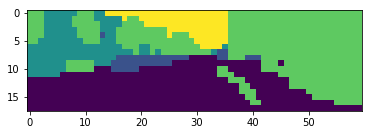

In [37]:
plt.imshow(data[0,:,:,0])

In [18]:
data[0,:,:,0]

array([[3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       [3, 3, 3, ..., 3, 3, 3],
       ..., 
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 3, 3, 3],
       [0, 0, 0, ..., 0, 0, 0]])

In [22]:
inputs= tf.placeholder(tf.float32, (None, 18,60,5), name="input")
outputs=tf.placeholder(tf.float32, (None, 18,60,5), name="ouput")

In [23]:
### Encoder use high level module 
conv1=tf.layers.conv2d(inputs=inputs,filters=16,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
#now (batch,18,60,16)

pool1=tf.layers.max_pooling2d(conv1,pool_size=(2,2),strides=(2,2),padding='same')
#now (batch,9,30,16)

conv2=tf.layers.conv2d(inputs=pool1,filters=8,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
# now (batch,9,30,8)

pool2=tf.layers.max_pooling2d(conv2,pool_size=(2,2),strides=(2,2),padding='same')
#now (batch,5,15,8)
#########################################################################################

### Decoder using high level modules 
upsample1=tf.image.resize_images(pool2,size=(9,30),
                                 method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
# now (batch,9,30,8)
conv4=tf.layers.conv2d(inputs=upsample1,filters=16,kernel_size=(3,3),padding='same',
                       activation=tf.nn.relu)
#now (batch,9,30,8)

upsample2 = tf.image.resize_images(conv4, size=(18,60),
                                   method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
#now (batch,18,60,8)
out=tf.layers.conv2d(inputs=upsample2,filters=5,kernel_size=(3,3),padding='same',
                       activation=tf.nn.sigmoid)

In [26]:
# define loss
learning_rate=1e-4
loss=tf.nn.l2_loss(out-outputs)
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(loss)

init=tf.global_variables_initializer()
train_size=data.shape[0]
train_indices=range(train_size)

# training process
with tf.Session() as sess:
    sess.run(init)
    for ipochs in range(30):
        perm_indices=np.random.permutation(train_indices)
        for step in range(int(train_size/batch_size)):
            offset=(step*batch_size)%(train_size-batch_size)
            batch_indices=perm_indices[offset:(offset+batch_size)]
            
            l,_=sess.run([loss,optimizer],feed_dict={inputs:data[batch_indices],
                                                     outputs:data[batch_indices]})
            
        print("Epoch: {}...".format(ipochs),
                       "Training loss: {:.4f}".format(l))
            
#test on reconstruction  

    reconstruction=sess.run(out,feed_dict={inputs:data[0:1]})
    
#plt.imshow(reconstruction[0,:,:,0])

Epoch: 0... Training loss: 1397.0542
Epoch: 1... Training loss: 1169.3750
Epoch: 2... Training loss: 1255.0314
Epoch: 3... Training loss: 927.9930
Epoch: 4... Training loss: 1055.0366
Epoch: 5... Training loss: 960.5538
Epoch: 6... Training loss: 843.7450
Epoch: 7... Training loss: 921.2224
Epoch: 8... Training loss: 917.3130
Epoch: 9... Training loss: 851.5352
Epoch: 10... Training loss: 923.1862
Epoch: 11... Training loss: 904.7434
Epoch: 12... Training loss: 837.9018
Epoch: 13... Training loss: 742.3932
Epoch: 14... Training loss: 814.9731
Epoch: 15... Training loss: 790.7560
Epoch: 16... Training loss: 744.1453
Epoch: 17... Training loss: 736.4362
Epoch: 18... Training loss: 766.8525
Epoch: 19... Training loss: 738.1409
Epoch: 20... Training loss: 800.6354
Epoch: 21... Training loss: 662.6362
Epoch: 22... Training loss: 808.5799
Epoch: 23... Training loss: 853.2076
Epoch: 24... Training loss: 793.0251
Epoch: 25... Training loss: 765.8461
Epoch: 26... Training loss: 719.5712
Epoch: 

In [27]:
reconstruction.shape

(1, 18, 60, 5)

In [28]:
reconstruction=np.argmax(reconstruction,axis=3)

In [29]:
reconstruction.shape

(1, 18, 60)

# input semantic

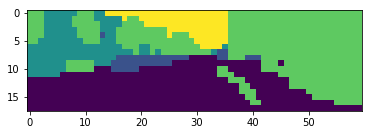

In [38]:
plt.imshow(data[0,:,:,0])

#  reconstruction semantic

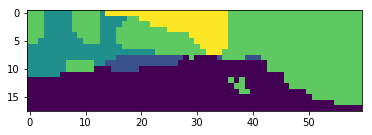

In [30]:
plt.imshow(reconstruction[0])